# 回归算法挑战

预测住宅物业的销售价格取决于许多因素，包括物业的年龄、当地设施的可用性和位置。

在这个挑战中，你将使用一个房地产销售交易的数据集，根据房产的特点来预测其每单位的价格。该数据中的单价是基于3.3平方米的单位测量。

> **引用**。本练习中使用的数据源自于以下研究。
>
> *Yeh, I. C., & Hsu, T. K. (2018). 通过基于案例的推理，用比较的方法建立房地产估值模型。应用软计算，65，260-271.*。
>
> 这是从UCI数据集库中获得的（Dua, D. and Graff, C. (2019). [UCI机器学习资源库](http://archive.ics.uci.edu/ml)。加州欧文市。加州大学信息与计算机科学学院）。

## 审查数据

运行下面的单元格来加载数据并查看前几行。

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


该数据由以下变量组成。

- **transaction_date** - 交易日期（例如，2013.250=2013年3月，2013.500=2013年6月，等等）。
- **house_age** - 房龄（以年为单位）。
- **transit_distance** - 到最近的轻轨站的距离（以米为单位）。
- **local_convenience_stores** -步行距离内的便利店数量
- **latitude** -地理坐标，纬度
- **longitude** -地理坐标，经度
- **price_per_unit**单位面积（3.3平方米）的房屋价格

## 训练一个回归模型

你的挑战是探索和准备数据，确定有助于预测**price_per_unit**标签的预测特征，并训练一个回归模型，在针对测试数据子集进行评估时，达到你能达到的最低均方根误差（RMSE）（必须小于**7**）。

根据需要添加标记和代码单元来创建你的解决方案。

In [2]:
# Your code to explore data and train a regression model

# 使用训练好的模型

保存你的训练模型，然后用它来预测以下房地产交易的每单位价格。

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [3]:
# 来吧

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=259c0b31-83b0-40c3-9697-6997f75bdbbe' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [4]:
numeric_features = ['house_age','transit_distance','local_convenience_stores','latitude','longitude']
data[numeric_features + ['price_per_unit']].describe()

,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


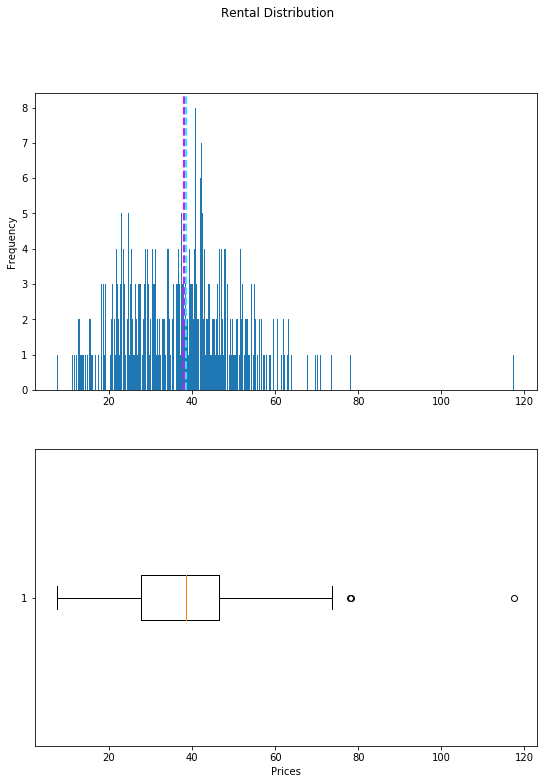

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
label = data['price_per_unit']

fig, ax = plt.subplots(2, 1,figsize = (9,12))

ax[0].hist(label,bins=500)
ax[0].set_ylabel('Frequency')

ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)


ax[1].boxplot(label, vert = False)
ax[1].set_xlabel('Prices')
fig.suptitle('Rental Distribution')
fig.show()

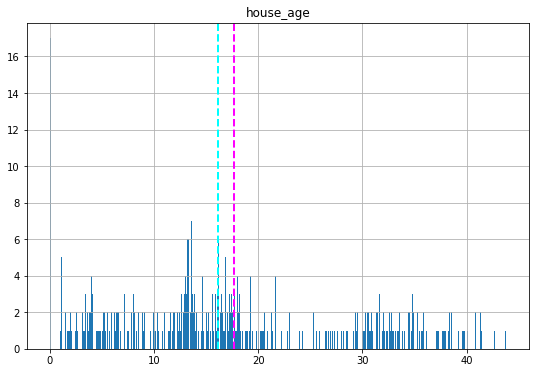

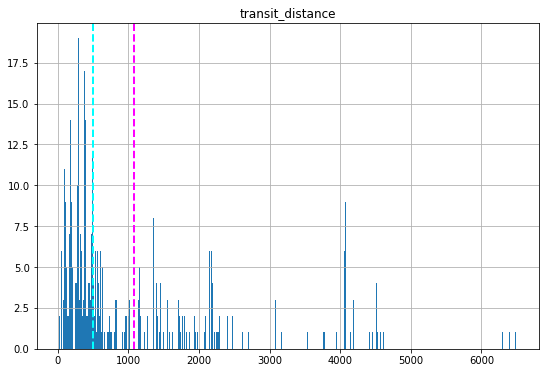

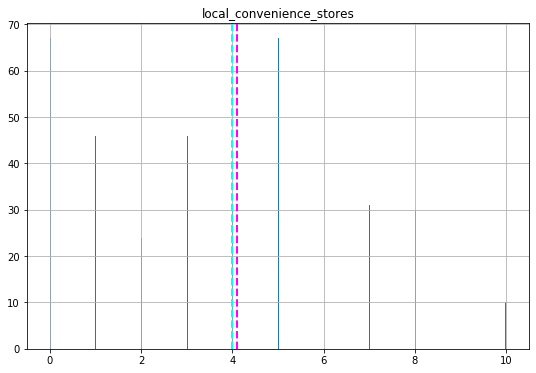

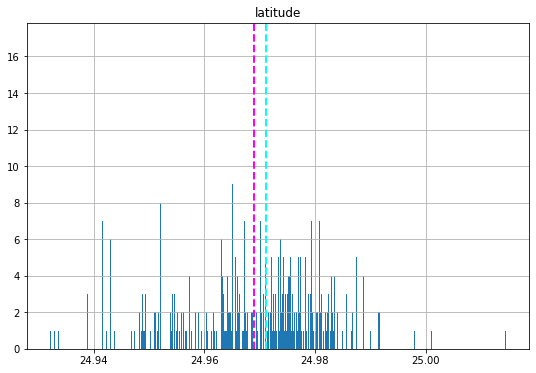

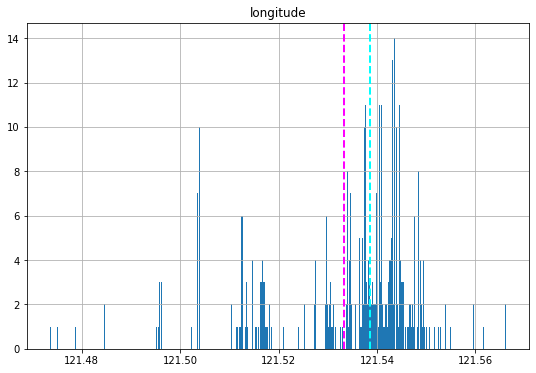

In [6]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=500, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

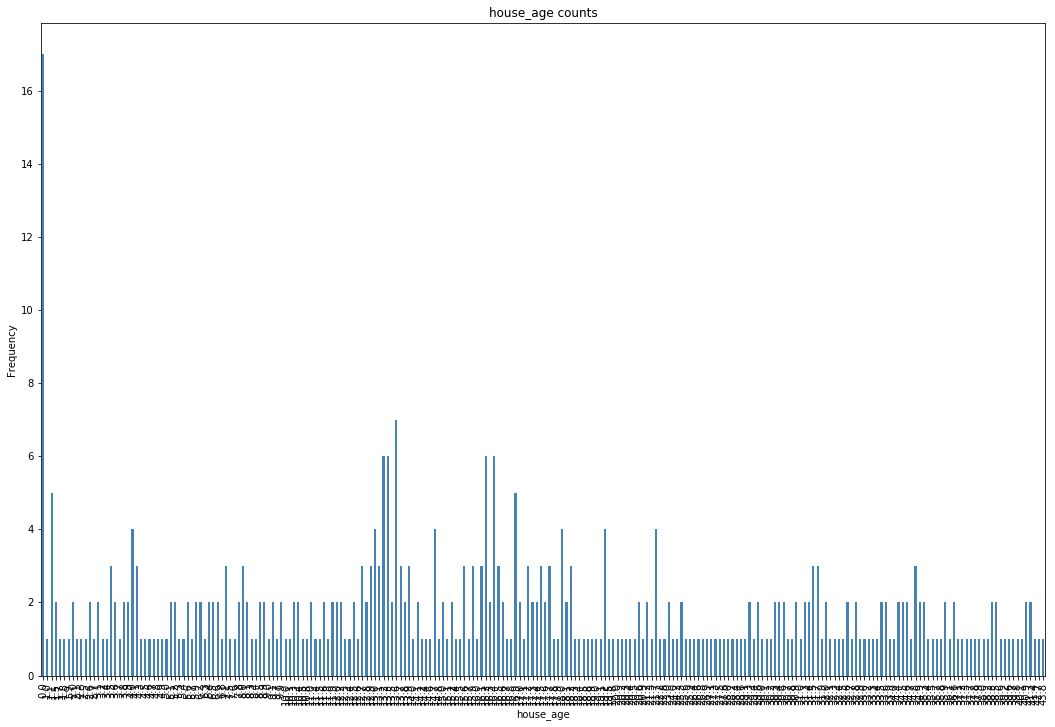

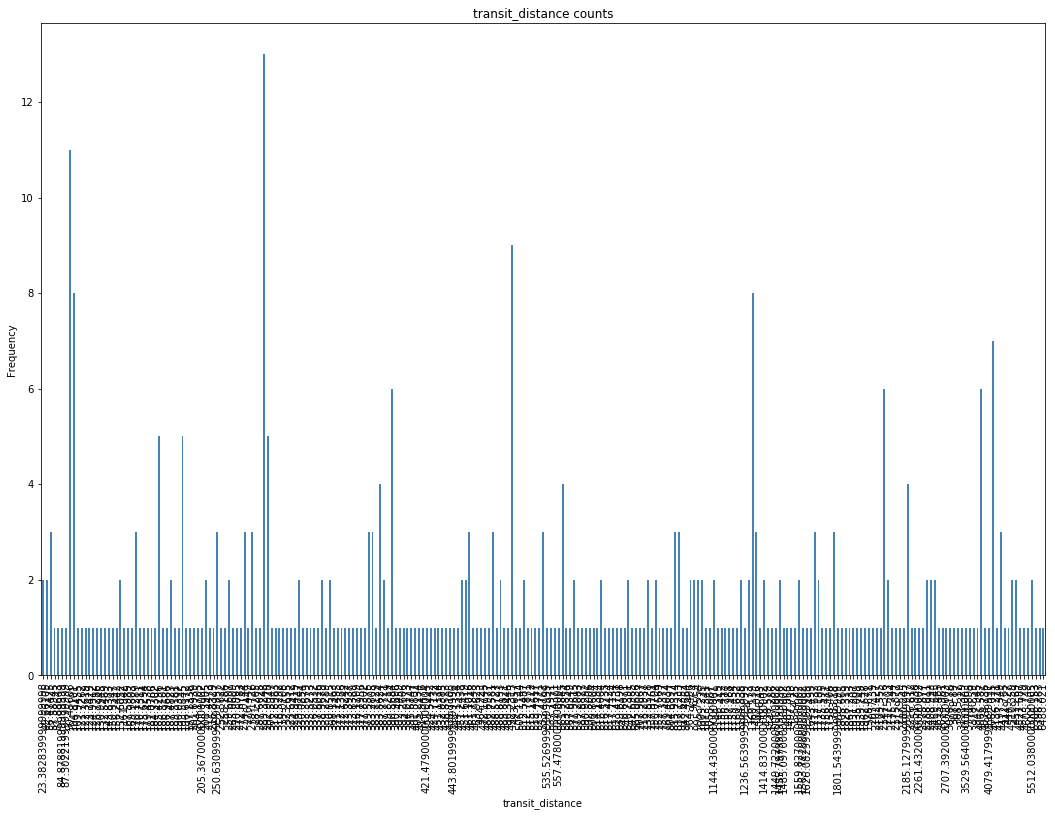

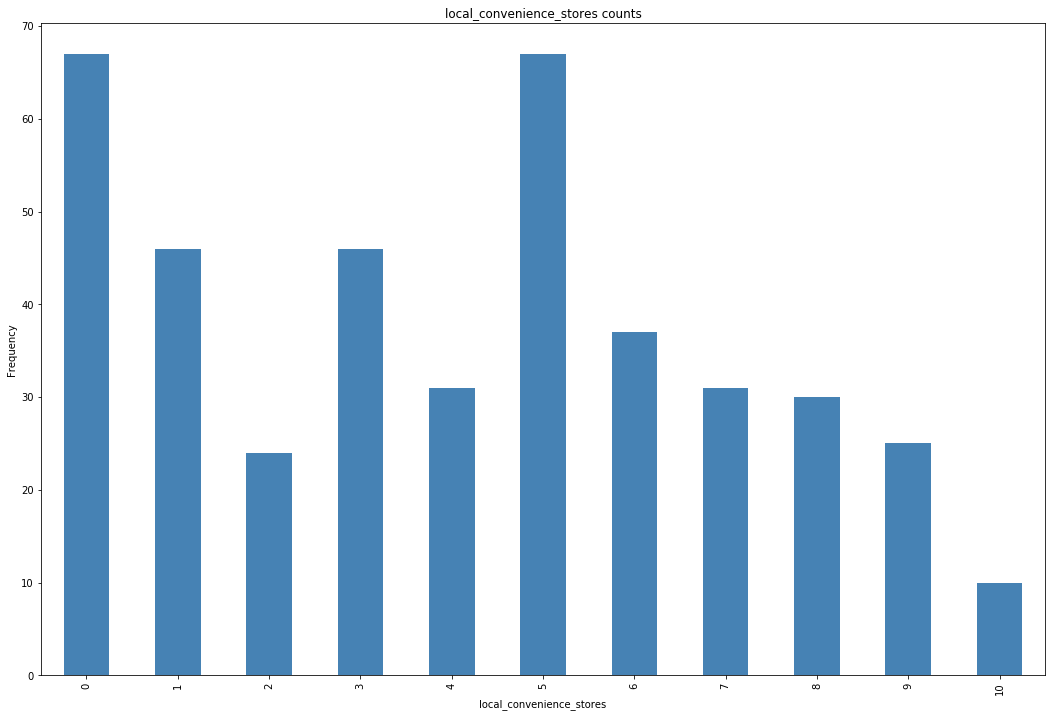

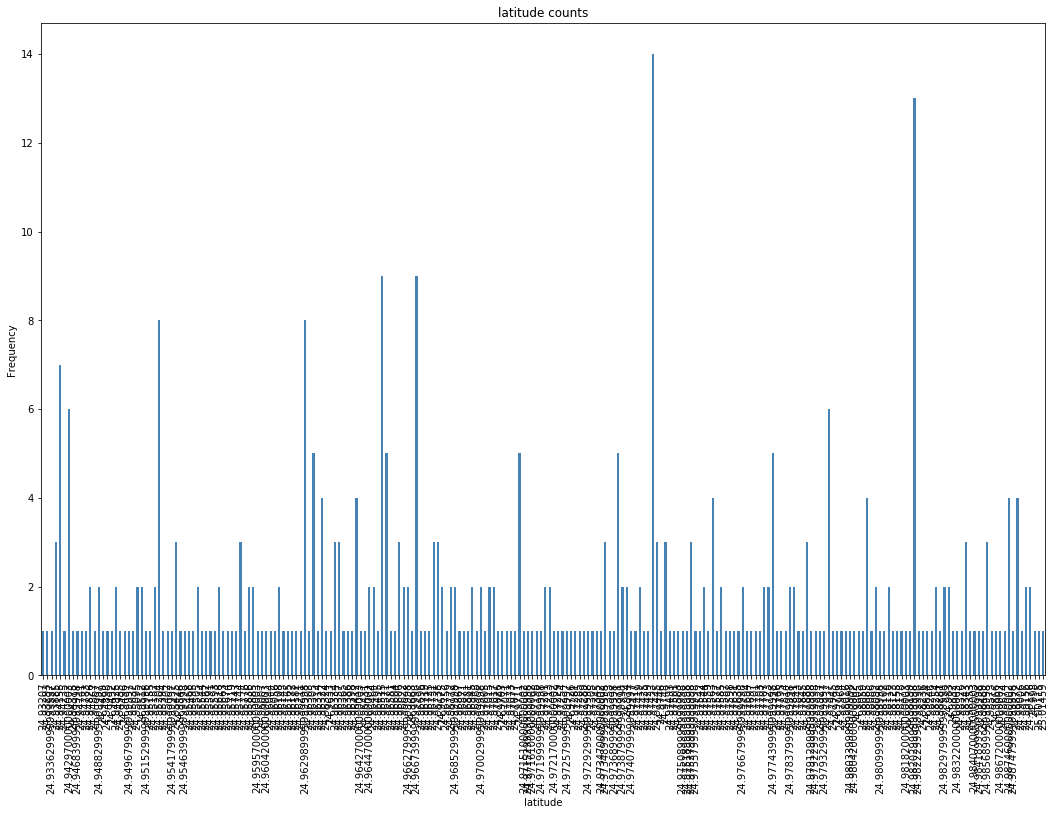

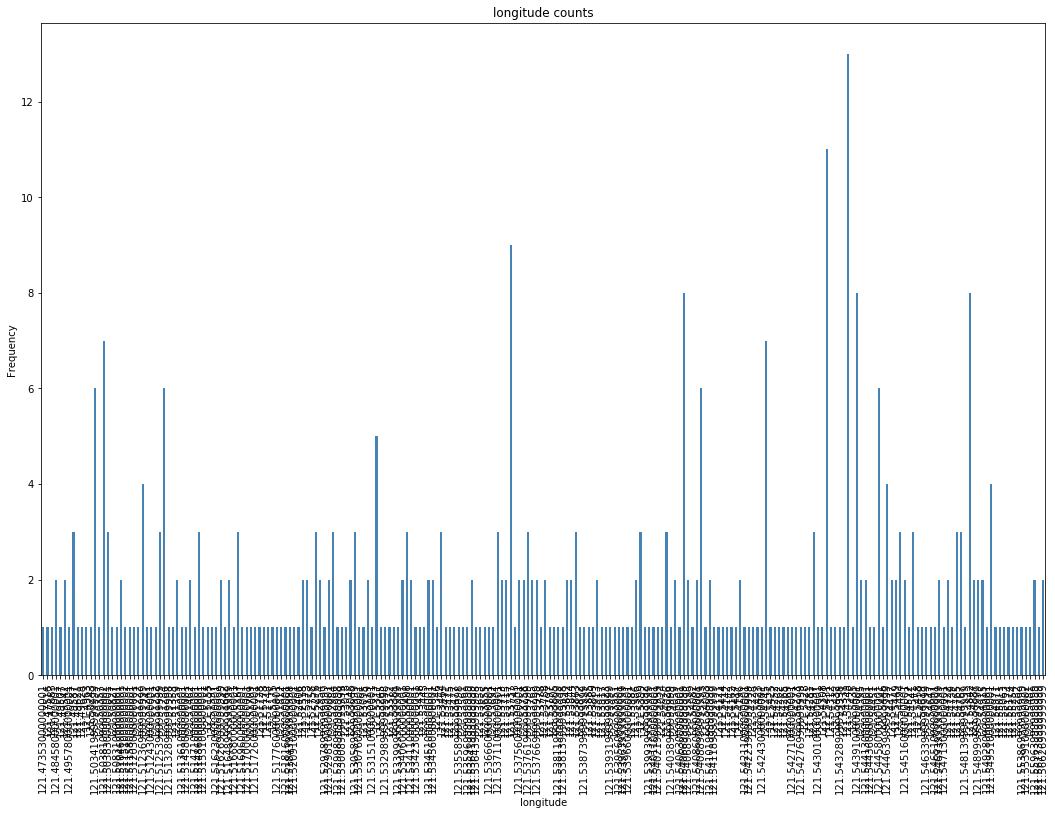

In [7]:
import numpy as np

# plot a bar plot for each categorical feature count
categorical_features = ['house_age','transit_distance','local_convenience_stores','latitude','longitude']

for col in categorical_features:
    counts = data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(18,12))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()


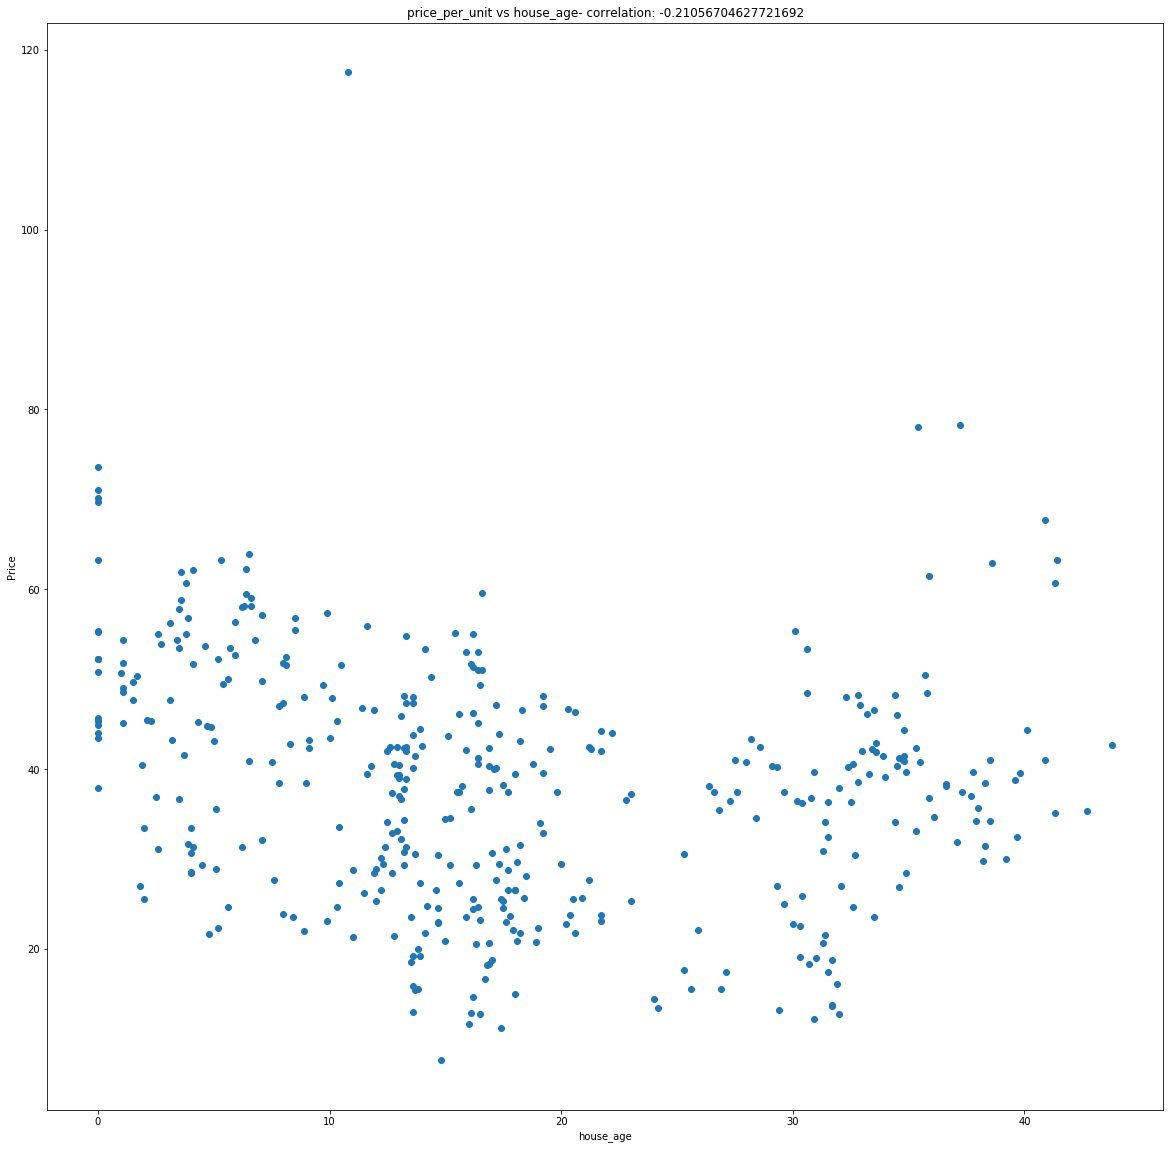

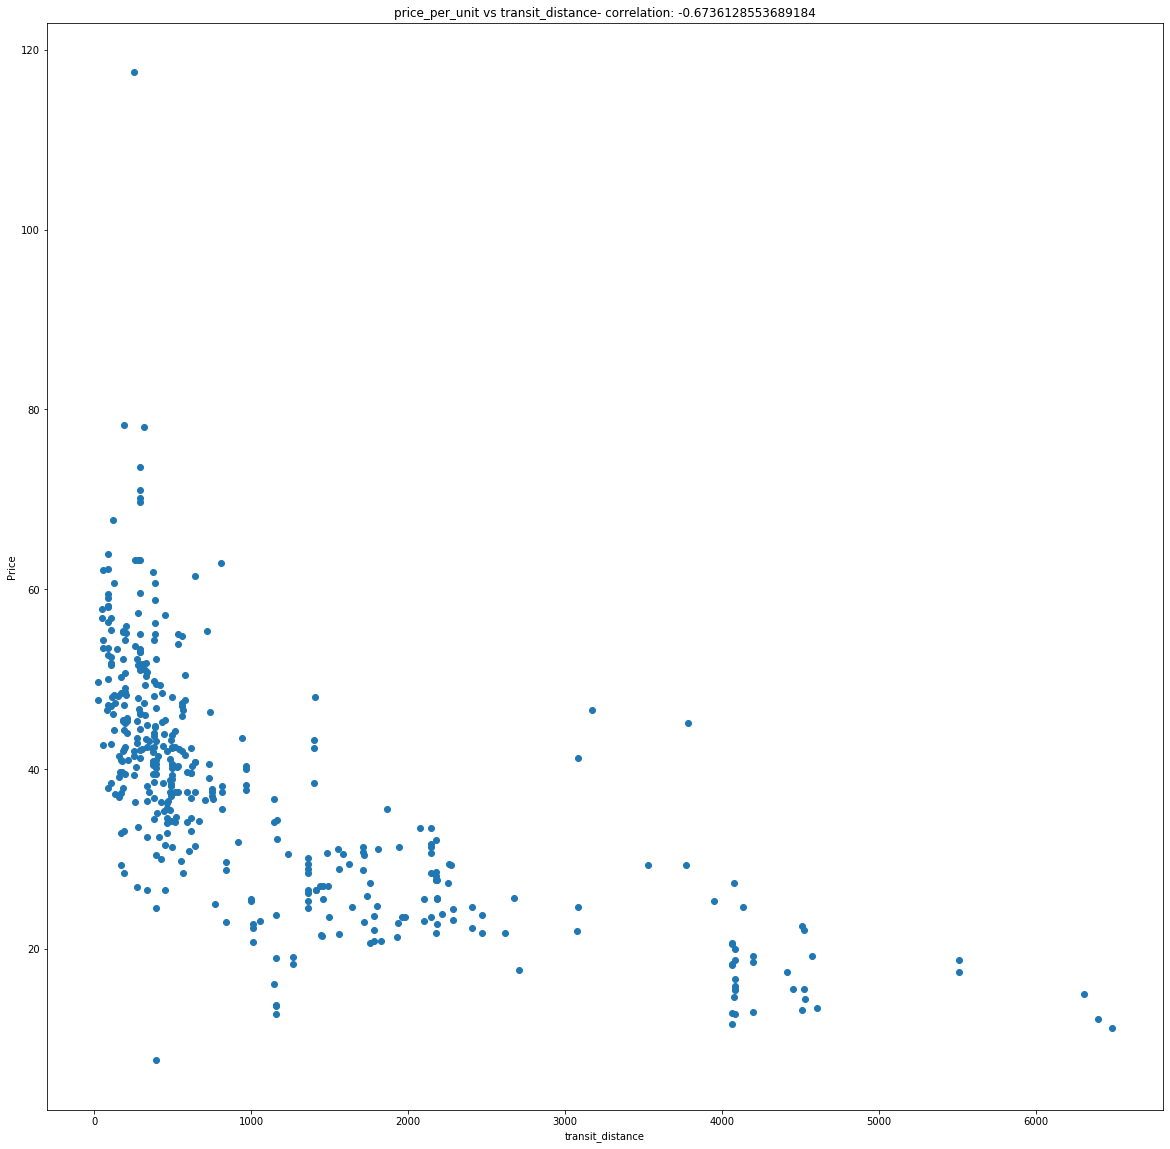

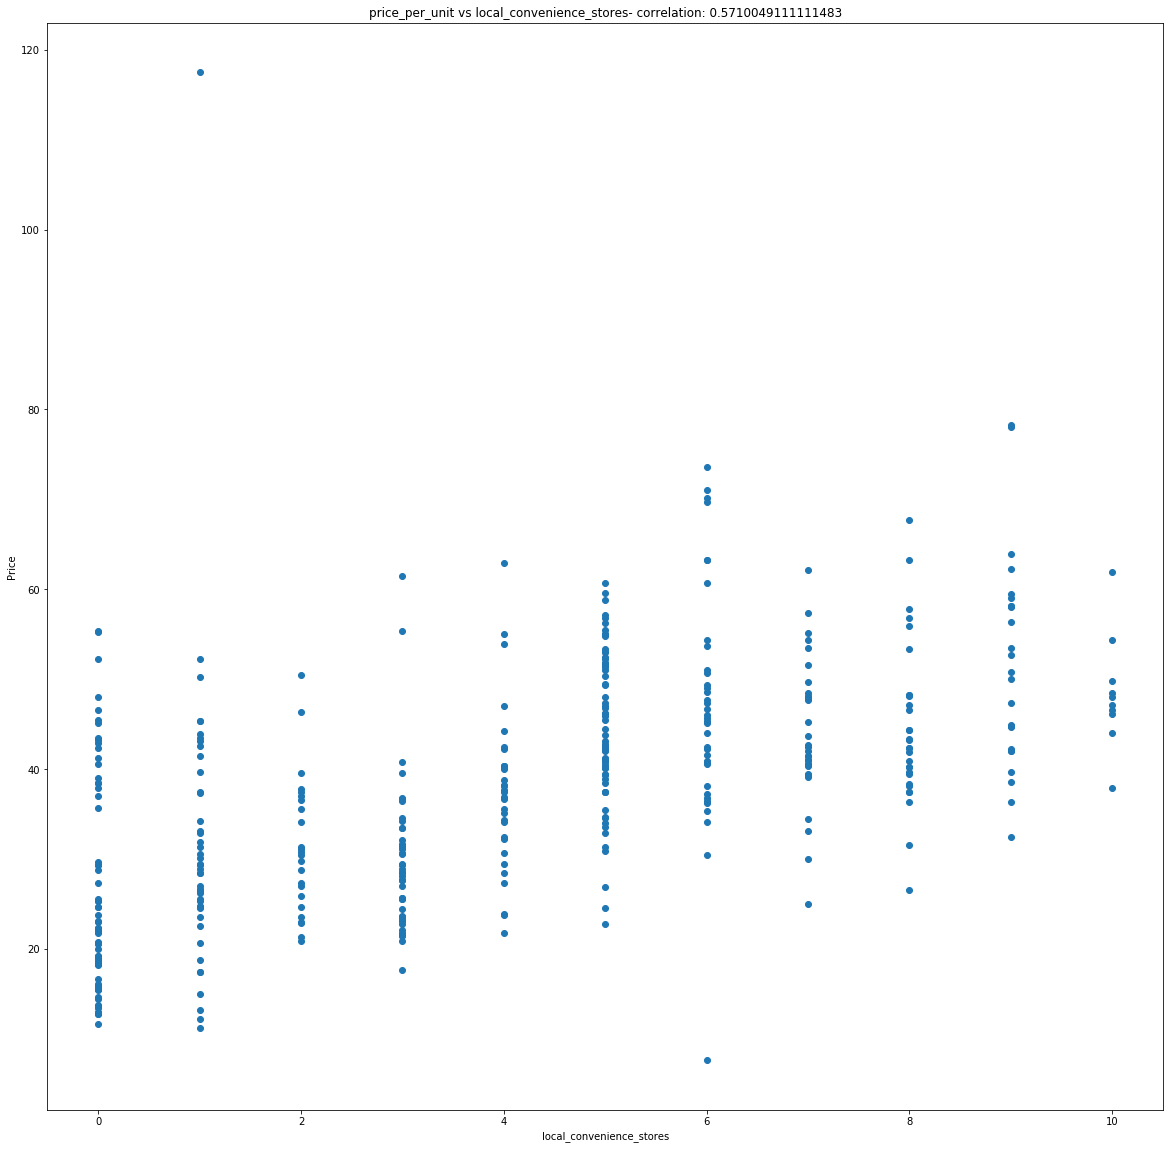

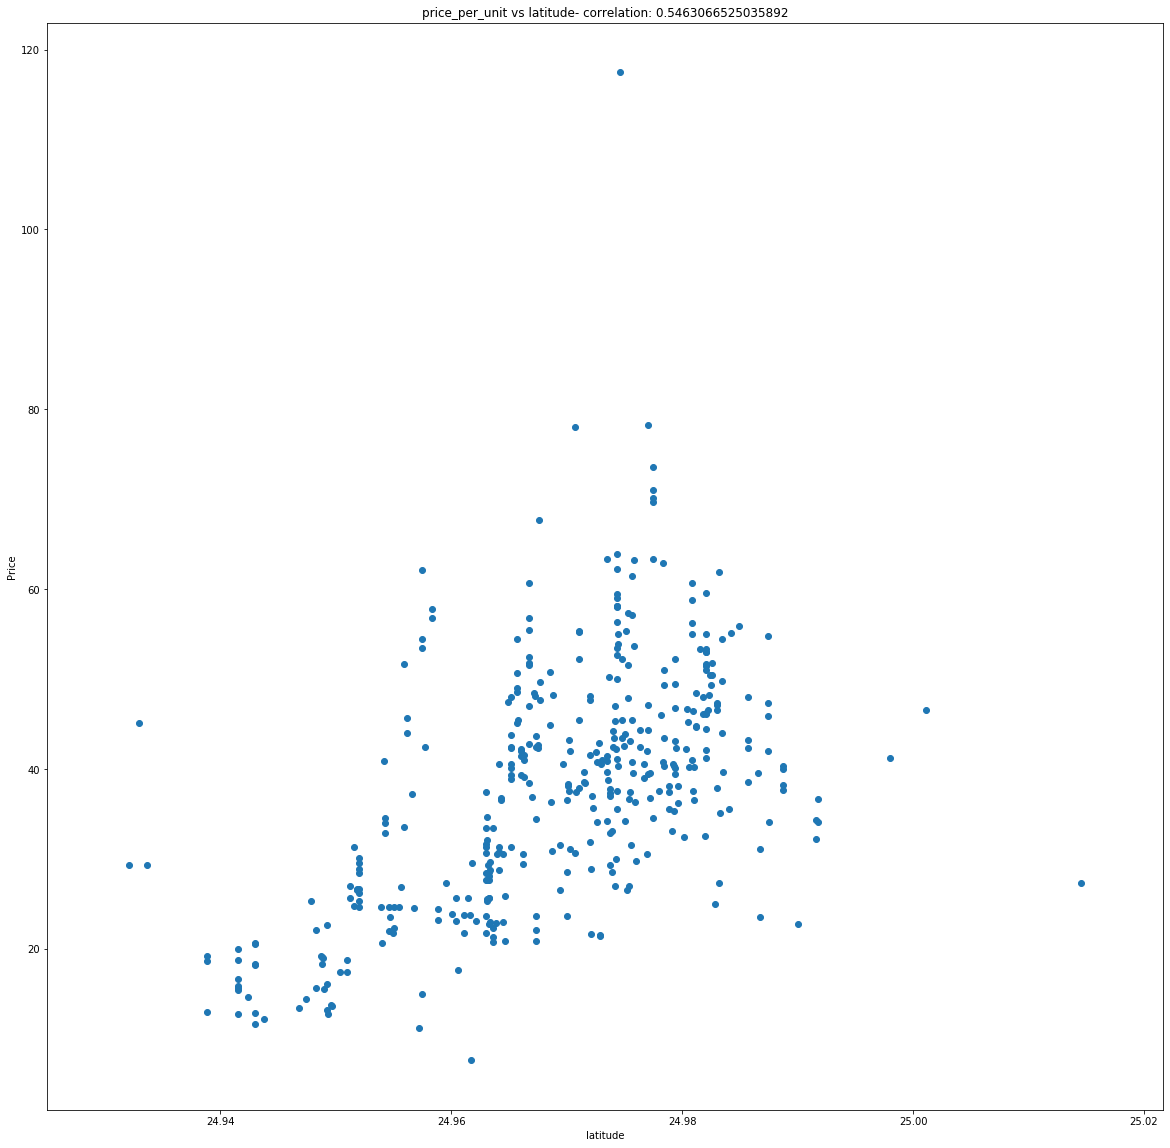

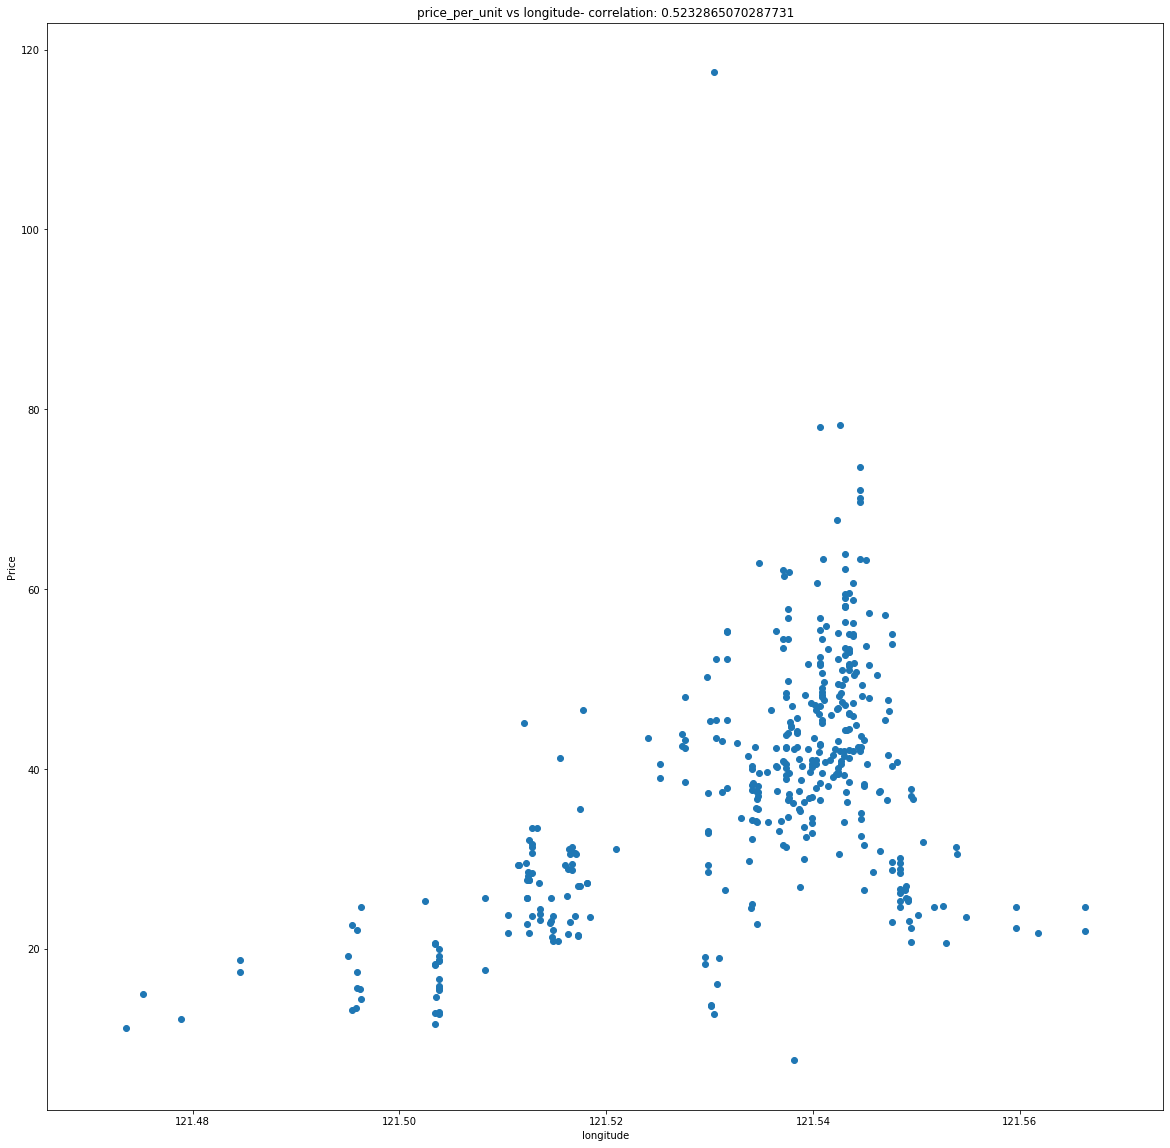

In [8]:
for col in numeric_features:
    fig = plt.figure(figsize=(20,20))
    ax = fig.gca()
    feature = data[col]
    label = data['price_per_unit']
    correlation = feature.corr(label)
    ##求feature与label的相关性
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Price')
    ax.set_title('price_per_unit vs ' + col + '- correlation: ' + str(correlation))
plt.show()

In [9]:
X, y = data[['house_age','transit_distance','local_convenience_stores','latitude','longitude']].values, data['price_per_unit'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[3.2000000e+01 8.4878820e+01 1.0000000e+01 2.4982980e+01 1.2154024e+02]
 [1.9500000e+01 3.0659470e+02 9.0000000e+00 2.4980340e+01 1.2153951e+02]
 [1.3300000e+01 5.6198450e+02 5.0000000e+00 2.4987460e+01 1.2154391e+02]
 [1.3300000e+01 5.6198450e+02 5.0000000e+00 2.4987460e+01 1.2154391e+02]
 [5.0000000e+00 3.9056840e+02 5.0000000e+00 2.4979370e+01 1.2154245e+02]
 [7.1000000e+00 2.1750300e+03 3.0000000e+00 2.4963050e+01 1.2151254e+02]
 [3.4500000e+01 6.2347310e+02 7.0000000e+00 2.4979330e+01 1.2153642e+02]
 [2.0300000e+01 2.8760250e+02 6.0000000e+00 2.4980420e+01 1.2154228e+02]
 [3.1700000e+01 5.5120380e+03 1.0000000e+00 2.4950950e+01 1.2148458e+02]
 [1.7900000e+01 1.7831800e+03 3.0000000e+00 2.4967310e+01 1.2151486e+02]]

Labels:
[37.9 42.2 47.3 54.8 43.1 32.1 40.3 46.7 18.8 22.1]


In [10]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 289 rows
Test Set: 125 rows


In [11]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [12]:

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [42. 12. 41. 12. 41. 40. 40. 34. 48. 45.]
Actual labels   :  [45.3 14.4 46.  15.6 50.2 38.1 48.5 41.4 51.6 40.1]


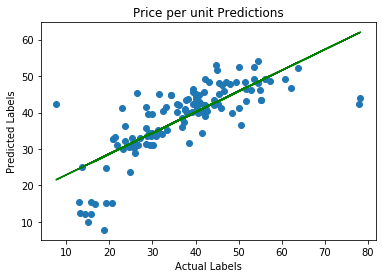

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price per unit Predictions')
##srlay the regression line
z = np.polyfit(y_test, predictions, 1)
z = np.polyfit(y_test,predictions,1)
p = np.poly1d(z)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='green')
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 73.60590688991826
RMSE: 8.579388491606979
R2: 0.5681018510026


In [15]:
testdata = pd.read_csv('data/example.csv')
testdata.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,Unnamed: 6,Unnamed: 7
0,2013.167,16.2,289.3248,5,24.98203,121.54348,NaN,NaN
1,2013.000,13.6,4082.0150,0,24.94155,121.50381,NaN,NaN


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) 

MSE: 78.56402072588622
RMSE: 8.863634735585974
R2: 0.5390090746378506


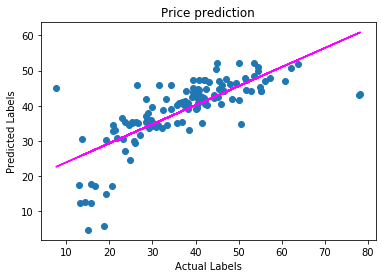

In [16]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price prediction')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') 

|--- feature_1 <= 826.83
|   |--- feature_0 <= 11.70
|   |   |--- feature_4 <= 121.53
|   |   |   |--- value: [117.50]
|   |   |--- feature_4 >  121.53
|   |   |   |--- feature_3 <= 24.97
|   |   |   |   |--- feature_1 <= 130.53
|   |   |   |   |   |--- feature_3 <= 24.96
|   |   |   |   |   |   |--- feature_3 <= 24.96
|   |   |   |   |   |   |   |--- feature_0 <= 3.45
|   |   |   |   |   |   |   |   |--- value: [54.40]
|   |   |   |   |   |   |   |--- feature_0 >  3.45
|   |   |   |   |   |   |   |   |--- value: [53.50]
|   |   |   |   |   |   |--- feature_3 >  24.96
|   |   |   |   |   |   |   |--- feature_0 <= 3.70
|   |   |   |  

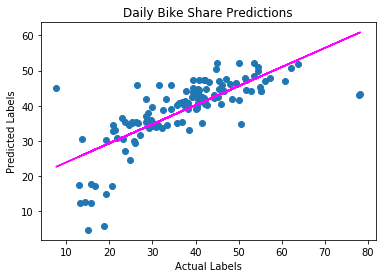

In [18]:
# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) 

MSE: 66.75534633866667
RMSE: 8.170394503245646
R2: 0.6082989567335999


/opt/tljh/user/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


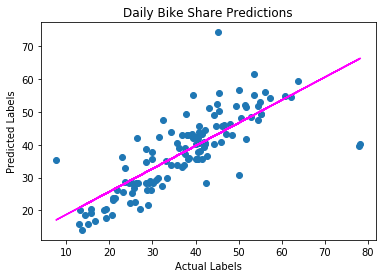

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 

MSE: 68.70609054738127
RMSE: 8.288913713351182
R2: 0.5968525545559693


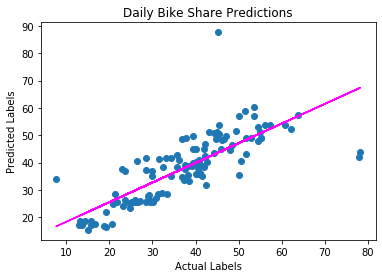

In [20]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 50} 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 

MSE: 64.83530868414708
RMSE: 8.05203754860514
R2: 0.6195651817423145


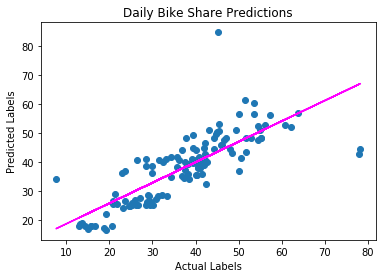

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [26]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [0,1,2]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [3,4]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [0, 1, 2]),
                                                 ('cat',
                                                  Pipeline(memory=None

MSE: 53.73380251692001
RMSE: 7.330334406895774
R2: 0.6847056054841123


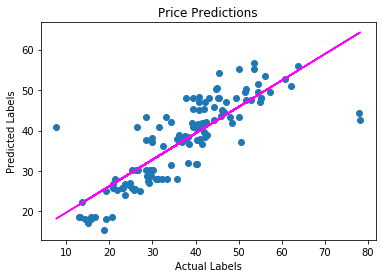

In [27]:
# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

/opt/tljh/user/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [0, 1, 2]),
                                                 ('cat',
                                                  Pipeline(memory=None

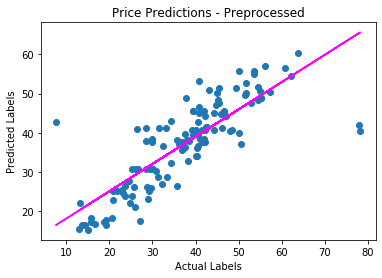

In [29]:
# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [42]:
import joblib

# 将模型保存为一个pickle文件
filename = './models/houseprice.pkl'
joblib.dump(model, filename)

['./models/houseprice.pkl']

In [43]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[16.2,289.3248,5,24.98203,121.54348]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [16.2, 289.3248, 5.0, 24.98203, 121.54348]
Prediction: 49 rentals


In [44]:
# An array of features based on five-day weather forecast
X_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.50381]])

# Use the model to predict rentals
results = loaded_model.predict(X_new)
print('2-day price predictions:')
for prediction in results:
    print(np.round(prediction))

2-day price predictions:
49.0
16.0
